# Primer caso: Clasificación
## integrantes :  
## David Ramírez Moreno  
## David Otalora Bernal
## Profesor:
## Luis Francisco Lopez Castro
### Context:
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is.

In [1]:
#importar librerias necesarias
import numpy as np
import pandas as pd

In [2]:
#leer nombre de las columnas y asignarlos al dataframe

df=pd.read_csv("Data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#revisar si existen nulos y el tipo de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## 1. Análisis preliminar de los datos. Usar gráficas y estadísticas descriptivas. Enfocarse en encontrar características que contribuyan a separar los datos por clases.

al analizar las caracteristicas identificamos que las que nos permiten separar los datos por clases son las siguientes:
    1. blue: 1 si el dispositivo tiene bluetooth, 0 en caso contrario
    2. dual_sim:1 si el dispositivo tiene doble sim, 0 en caso contrario
    3. four_g:1 si el dispositivo tiene 4G, 0 en caso contrario
    4. three_g:1 si el dispositivo tiene 3G, 0 en caso contrario
    5. touch_screen:1 si el dispositivo tiene pantalla tactil, 0 en caso contrario
    6. wifi:1 si el dispositivo tiene wifi, 0 en caso contrario
    7. price_range: se diferencian 4 casos, 0 si el costo es bajo, 1 si tiene costo medio, 2 si tiene alto costo y 3 si tiene un muy alto costo

consideramos la del rango de precio es la que nos permitirá clasificar los dispositivos de una mejor manera, y para ello la usaremos de referencia con las demas caracteristicas.
 

<BarContainer object of 6 artists>

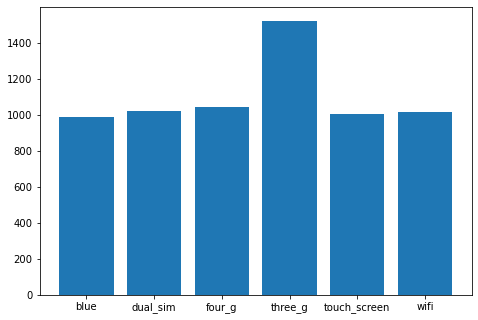

In [4]:
import matplotlib.pyplot as plt
#obtener numero de dispositivos que cuentan con las caracteristicas identificadas
caracteristicas=["blue","dual_sim","four_g","three_g","touch_screen","wifi"]
values=[]
for c in caracteristicas:
    values.append(df[c].value_counts()[1])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(caracteristicas,values)

en el grafico se encuentra el número de dispositivos que cuentan con las diferentes tecnologías, se observa que el 3G es una característica presente en la mayoría de equipos, por tanto se descartara de las evaluaciones posteriores, al no ofrecer información muy importante a la hora de clasificar.
### Numero de dispositivos por costo

<BarContainer object of 4 artists>

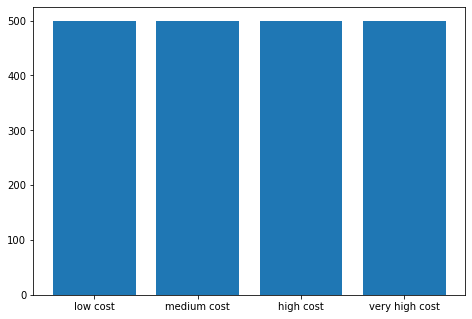

In [5]:
values=[]
for i in range(4):
    values.append(df["price_range"].value_counts()[i])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(["low cost","medium cost","high cost","very high cost"],values)

## comparación de caracteristicas contra precio.
### Bluetooth

<BarContainer object of 4 artists>

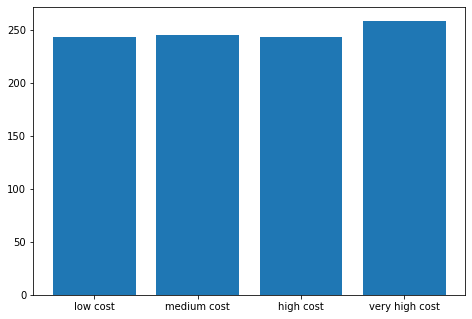

In [6]:
values=[0,0,0,0]
for i,row in df.iterrows():
    if row["blue"]==1:
        values[row["price_range"].astype(int)]+=1
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(["low cost","medium cost","high cost","very high cost"],values)


### Doble sim

<BarContainer object of 4 artists>

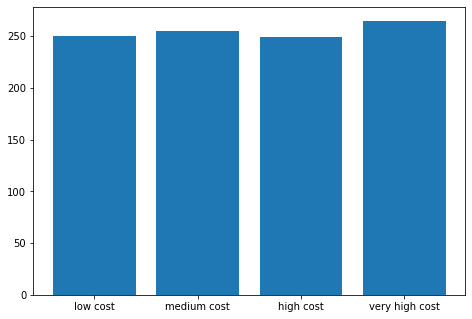

In [7]:
values=[0,0,0,0]
for i,row in df.iterrows():
    if row["dual_sim"]==1:
        values[row["price_range"].astype(int)]+=1
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(["low cost","medium cost","high cost","very high cost"],values)

### tecnología 4G

<BarContainer object of 4 artists>

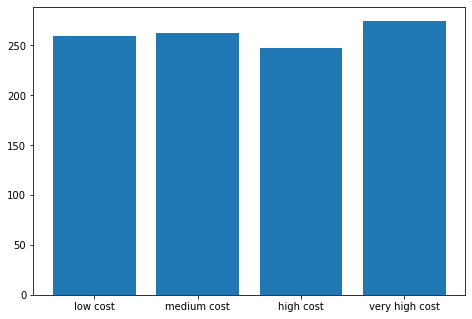

In [8]:
values=[0,0,0,0]
for i,row in df.iterrows():
    if row["four_g"]==1:
        values[row["price_range"].astype(int)]+=1
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(["low cost","medium cost","high cost","very high cost"],values)

### Pantalla tactil

<BarContainer object of 4 artists>

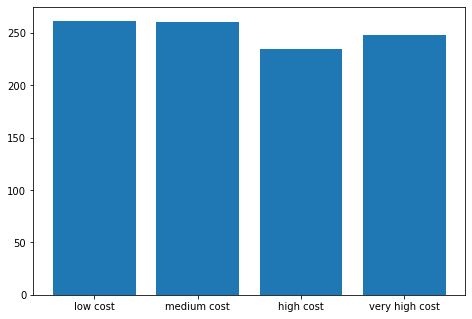

In [9]:
values=[0,0,0,0]
for i,row in df.iterrows():
    if row["touch_screen"]==1:
        values[row["price_range"].astype(int)]+=1
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(["low cost","medium cost","high cost","very high cost"],values)

### WIFI

<BarContainer object of 4 artists>

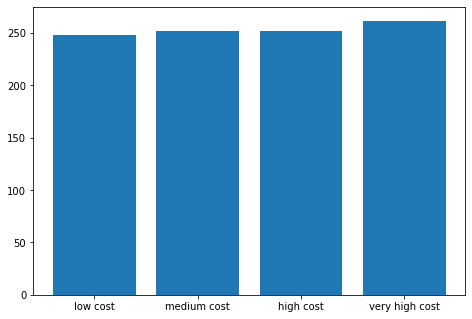

In [10]:
values=[0,0,0,0]
for i,row in df.iterrows():
    if row["wifi"]==1:
        values[row["price_range"].astype(int)]+=1
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(["low cost","medium cost","high cost","very high cost"],values)

para todas las caracteristicas se identifica que existe una cantidad muy similar de equipos para cada rango de precio, por tanto su relevancia a la hora de derterminar el precio es baja y se deben evaluar nuevas alternativas, contradiciendo nuestra hipotesis principal

## Para las demas caracteristicas contra precio se encuentran los siguientes comportamientos
### RAM

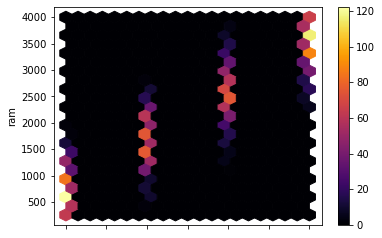

In [11]:
df.plot.hexbin(x="price_range",y="ram",gridsize=20, colormap="inferno")

### Numero de "cores" por procesador

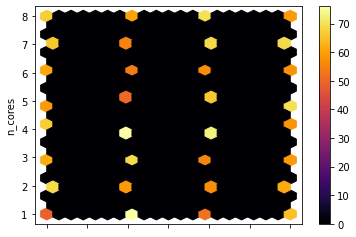

In [12]:
df.plot.hexbin(x="price_range",y="n_cores",gridsize=20, colormap="inferno")

### memoria interna en GB

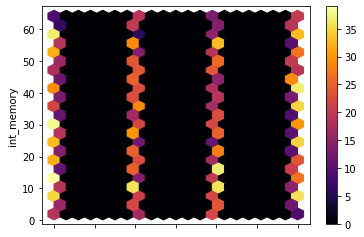

In [13]:
df.plot.hexbin(x="price_range",y="int_memory",gridsize=20, colormap="inferno")

### talk time

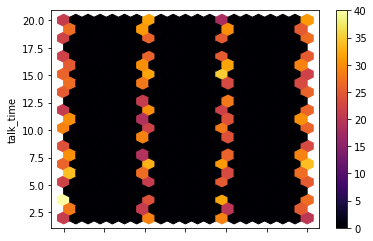

In [14]:
df.plot.hexbin(x="price_range",y="talk_time",gridsize=20, colormap="inferno")

### energia que puede almacenar la bateria

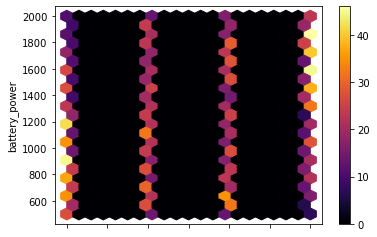

In [15]:
df.plot.hexbin(x="price_range",y="battery_power",gridsize=20, colormap="inferno")

### velocidad del reloj

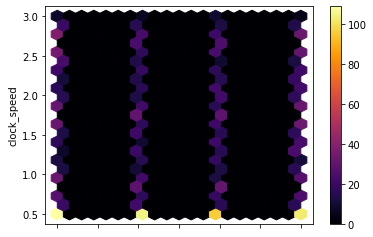

In [16]:
df.plot.hexbin(x="price_range",y="clock_speed",gridsize=20, colormap="inferno")

### mega pixeles de la camara frontal

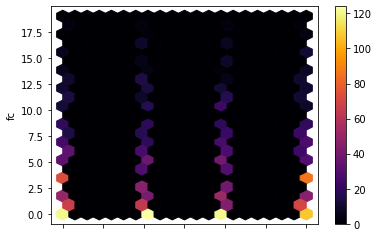

In [17]:
df.plot.hexbin(x="price_range",y="fc",gridsize=20,colormap="inferno")

### Mobile depth

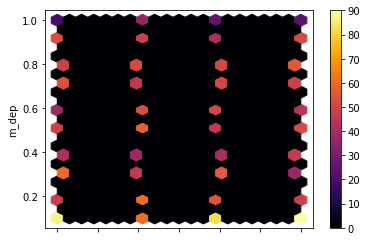

In [18]:
df.plot.hexbin(x="price_range",y="m_dep",gridsize=20,colormap="inferno")

### peso del teléfono

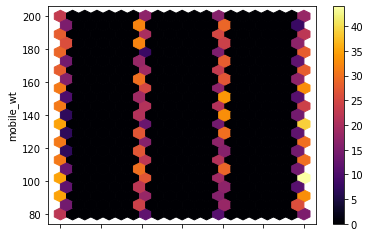

In [19]:
df.plot.hexbin(x="price_range",y="mobile_wt",gridsize=20,colormap="inferno")

### cámara principal

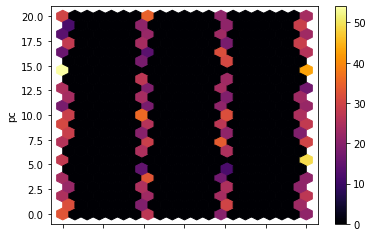

In [20]:
df.plot.hexbin(x="price_range",y="pc",gridsize=20,colormap="inferno")

reivsando los graficos se identifica que los comportamientos son muy similares, sin embargo identificamos que a mayor ram mayor precio, lo que puede evidenciar que es la caracteristica principal a la hora de definir el precio, seguida de los megapixeles en la camara frontal.

### tamaño de los teléfonos
dimensiones:

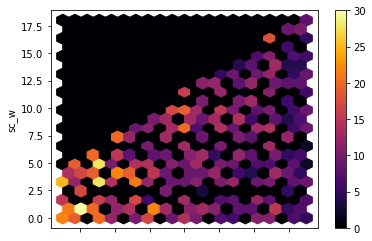

In [21]:
df.plot.hexbin(x="sc_h",y="sc_w",gridsize=20,colormap="inferno")

pixeles:

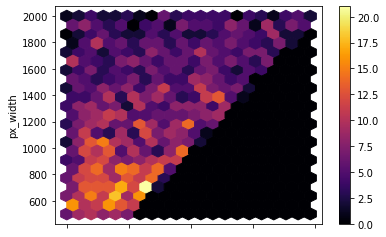

In [22]:
df.plot.hexbin(x="px_height",y="px_width",gridsize=20,colormap="inferno")

## 2. Descripción y comparación de los métodos de clasificación utilizados. Selección del método que recomendarán para su uso. La selección debe basarse con base en la Exactitud (ACC).

In [23]:
#definimos los datos, las clasificaciones y entrenamos el modelo
from sklearn.model_selection import train_test_split
x,y=df[df.columns[:-1]],df['price_range']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [24]:
#importar librerias necesarias
#porcentaje de aciertos del metodo y matriz de confusion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#modelo lineal
from sklearn.linear_model import LinearRegression
#k vecinos
from sklearn.neighbors import KNeighborsClassifier
#Bayes ingenuo
from sklearn.naive_bayes import GaussianNB
#naive Bayes Bernoulli
from sklearn.naive_bayes import BernoulliNB
#regresion logistica
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#maquina de soporte vectorial
from sklearn.svm import LinearSVC,SVC
#arbol de decisión
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#bagging 
from sklearn.ensemble import BaggingClassifier
#mismo seed para todos
np.random.seed(1234)
#lista para almacenar los resultados
resultados=[]

### se revisará cada metodo de clasificación y su accuracy score, se seleccionará el que tenga un mayor puntaje
#### Regresion lineal

In [25]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
lrYpredtemp=lr.predict(xtest)
lrYpred=np.rint(lrYpredtemp)
print("accuracy score para el modelo lineal:",accuracy_score(ytest,lrYpred))
print("predicción para datos cuando el modelo identifica categorias inexistentes '-1' y '4':\n")
print(confusion_matrix(ytest,lrYpred),"\n")
print("predicción para datos limitada a categorias existenes:\n")
print(confusion_matrix(ytest,lrYpred,labels=[0,1,2,3]))
resultados.append([accuracy_score(ytest,lrYpred),"modelo lineal"])

accuracy score para el modelo lineal: 0.875
predicción para datos cuando el modelo identifica categorias inexistentes '-1' y '4':

[[  0   0   0   0   0   0]
 [  5 123  17   0   0   0]
 [  0   1 145   6   0   0]
 [  0   0   7 144   0   0]
 [  0   0   0  34 113   5]
 [  0   0   0   0   0   0]] 

predicción para datos limitada a categorias existenes:

[[123  17   0   0]
 [  1 145   6   0]
 [  0   7 144   0]
 [  0   0  34 113]]


#### K vecinos

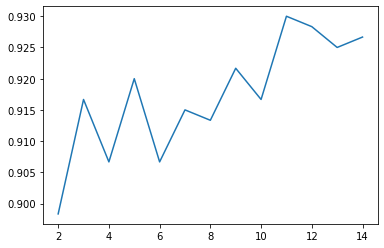

In [26]:
acc=[]
for i in range(2,15):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred=knn.predict(xtest)
    acc.append(accuracy_score(ytest,pred))
plt.plot(range(2,15),acc)
best=[max(acc),acc.index(max(acc))+2]
resultados.append([best[0],"clasificación de k vecinos con "+str(best[1])+" vecinos"])

#### Bayes ingenuo

In [27]:
nbc=GaussianNB()
nbc.fit(xtrain,ytrain)
nbcYpred=nbc.predict(xtest)
print("accuracy score para Bayes ingenuo:",accuracy_score(ytest,nbcYpred))
print("predicción de datos del modelo:\n")
print(confusion_matrix(ytest,nbcYpred),"\n")
resultados.append([accuracy_score(ytest,nbcYpred),"Bayes ingenuo"])

accuracy score para Bayes ingenuo: 0.805
predicción de datos del modelo:

[[126  19   0   0]
 [ 12 116  24   0]
 [  0  29 111  11]
 [  0   1  21 130]] 



#### Bayes Bernoulli

In [28]:
nbb=BernoulliNB()
nbb.fit(xtrain,ytrain)
nbbYpred=nbb.predict(xtest)
print("accuracy score para Bayes Bernoulli:",accuracy_score(ytest,nbbYpred))
print("predicción de datos del modelo:\n")
print(confusion_matrix(ytest,nbbYpred),"\n")
resultados.append([accuracy_score(ytest,nbbYpred),"bayes Bernoulli"])

accuracy score para Bayes Bernoulli: 0.24166666666666667
predicción de datos del modelo:

[[34 46 35 30]
 [50 27 38 37]
 [39 20 41 51]
 [34 31 44 43]] 



#### regresion logistica

In [29]:
lor=LogisticRegression()
x2=StandardScaler().fit_transform(x)
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y,test_size=0.3,stratify=y)
lor.fit(x2_train,y2_train)
lorYpred=lor.predict(x2_test)
print("accuracy score para Regresion logistica:",accuracy_score(y2_test,lorYpred))
print("predicción del modelo:\n")
print(confusion_matrix(ytest,lorYpred),"\n")
resultados.append([accuracy_score(y2_test,lorYpred),"regresion logistica"])

accuracy score para Regresion logistica: 0.9483333333333334
predicción del modelo:

[[34 37 36 38]
 [37 33 39 43]
 [40 45 31 35]
 [40 34 42 36]] 



#### Maquina de soporte vectorial

In [30]:
lsvm=LinearSVC(dual=False)
lsvm.fit(xtrain,ytrain)
lsvmYpred=lsvm.predict(xtest)
print("accuracy score maquina de soporte vectorial lineal:",accuracy_score(ytest,lsvmYpred))
print("predicción del modelo:\n")
print(confusion_matrix(ytest,lsvmYpred),"\n")
resultados.append([accuracy_score(ytest,lsvmYpred),"maquina de soporte vectorial lineal"])

accuracy score maquina de soporte vectorial lineal: 0.7883333333333333
predicción del modelo:

[[135   8   2   0]
 [ 19  93  40   0]
 [  0  35  94  22]
 [  0   0   1 151]] 



In [31]:
svm=SVC()
svm.fit(xtrain,ytrain)
svmYpred=svm.predict(xtest)
print("accuracy score maquina de soporte vectorial :", accuracy_score(ytest,svmYpred))
print("predicción del modelo:\n")
print(confusion_matrix(ytest,svmYpred),"\n")
resultados.append([accuracy_score(ytest,svmYpred),"maquina de soporte vectorial "])


accuracy score maquina de soporte vectorial : 0.955
predicción del modelo:

[[142   3   0   0]
 [  2 145   5   0]
 [  0   6 144   1]
 [  0   0  10 142]] 



#### Arbol de decisión

In [32]:
tree=DecisionTreeClassifier()
tree.fit(xtrain,ytrain)
treeYpredict=tree.predict(xtest)
print("accuracy score Arbol de decisión", accuracy_score(ytest,treeYpredict))
print("predicción del modelo:\n")
print(confusion_matrix(ytest,treeYpredict),"\n")
resultados.append([accuracy_score(ytest,treeYpredict),"Arbol de decisión"])

accuracy score Arbol de decisión 0.8333333333333334
predicción del modelo:

[[125  20   0   0]
 [ 15 119  18   0]
 [  0  15 127   9]
 [  0   0  23 129]] 



#### Bosque aleatorio

In [33]:
forest=RandomForestClassifier()
forest.fit(xtrain,ytrain)
forestYpred=forest.predict(xtest)
print("accuracy score Bosque aleatorio:", accuracy_score(ytest,forestYpred))
print("predicción del modelo:\n")
print(confusion_matrix(ytest,forestYpred),"\n")
resultados.append([accuracy_score(ytest,forestYpred),"Bosque aleatorio"])

accuracy score Bosque aleatorio: 0.875
predicción del modelo:

[[136   9   0   0]
 [  8 132  12   0]
 [  0  21 120  10]
 [  0   0  15 137]] 



#### Bagging

In [34]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
bagYpred=bag.predict(xtest)
print("accuracy score Bagging:", accuracy_score(ytest,bagYpred))
print("predicción del modelo:\n")
print(confusion_matrix(ytest,bagYpred),"\n")
resultados.append([accuracy_score(ytest,forestYpred),"Bagging"])

accuracy score Bagging: 0.8683333333333333
predicción del modelo:

[[136   9   0   0]
 [ 12 126  14   0]
 [  0  13 134   4]
 [  0   0  27 125]] 



In [35]:
resultados.sort()
posi=1
for i in resultados[::-1]:
    print(str(posi)+") el metodo",i[1],"tuvo un accuracy score de",i[0])
    posi+=1

1) el metodo maquina de soporte vectorial  tuvo un accuracy score de 0.955
2) el metodo regresion logistica tuvo un accuracy score de 0.9483333333333334
3) el metodo clasificación de k vecinos con 11 vecinos tuvo un accuracy score de 0.93
4) el metodo modelo lineal tuvo un accuracy score de 0.875
5) el metodo Bosque aleatorio tuvo un accuracy score de 0.875
6) el metodo Bagging tuvo un accuracy score de 0.875
7) el metodo Arbol de decisión tuvo un accuracy score de 0.8333333333333334
8) el metodo Bayes ingenuo tuvo un accuracy score de 0.805
9) el metodo maquina de soporte vectorial lineal tuvo un accuracy score de 0.7883333333333333
10) el metodo bayes Bernoulli tuvo un accuracy score de 0.24166666666666667


dados los resultados, la mejor opción a tomar es la maquina de soporte vectorial (SVC) obteniendo un 95% de accuracy

## Con el método seleccionado en el punto 2 deben realizar la predicción del rango de precios de los celulares cuyas características se encuentran en el archivo Predict.csv.

In [36]:
xFinal=pd.read_csv("Predict.csv",index_col=0)
xFinal.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
id,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [37]:
svmFinalpred=svm.predict(xFinal)

In [38]:
svmFinalpred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [39]:
xFinal["price_range"]=svmFinalpred

In [40]:
xFinal.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
id,,,,,,,,,,,,,,,,,,,,,
1,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
2,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
3,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
4,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
5,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [41]:
xFinal.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
id,,,,,,,,,,,,,,,,,,,,,
996,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
997,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
998,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
999,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
1000,1270,1,0.5,0,4,1,35,0.1,140,6,...,457,608,2828,9,2,3,1,0,1,2


In [42]:
xFinal.to_excel("PredictFinal.xlsx")